<a href="https://colab.research.google.com/github/shikha76/Stock-Price-Prediction/blob/main/stockpredic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Data Fetching
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

stock = "GOOG"
google_data = yf.download(stock, start, end)

/tmp/ipython-input-2727002366.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [25]:
#Overview of the data
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-12-27,10.497622,10.676110,10.451148,10.676110,269116950
2005-12-28,10.548303,10.575249,10.414067,10.490208,285783185
2005-12-29,10.386625,10.598733,10.362399,10.580192,278873383
2005-12-30,10.255851,10.338667,10.228163,10.315428,304621533
2006-01-03,10.759422,10.770298,10.338914,10.445214,526815259


In [26]:
google_data.shape

(5031, 5)

In [27]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,58.322915,58.929980,57.691503,58.295662,8.897764e+07
std,57.938779,58.584599,57.264471,57.905087,1.116372e+08
min,6.364233,6.659159,6.113561,6.489571,1.584340e+05
25%,14.364765,14.510990,14.251789,14.400858,2.521500e+07
50%,34.991062,35.315129,34.542426,34.921577,4.192000e+07
75%,87.462765,88.252589,86.375919,87.225050,1.105950e+08
max,323.428986,328.455705,319.771365,326.586898,1.650833e+09


In [28]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-12-27 to 2025-12-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [29]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [30]:
#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

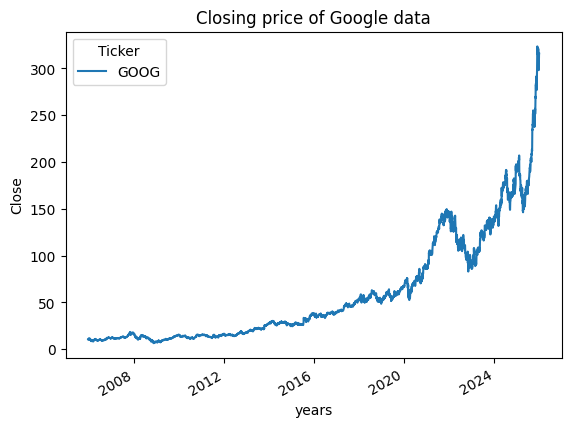

In [31]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [32]:
#Reusable Function to generalize plotting for any column.
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [33]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

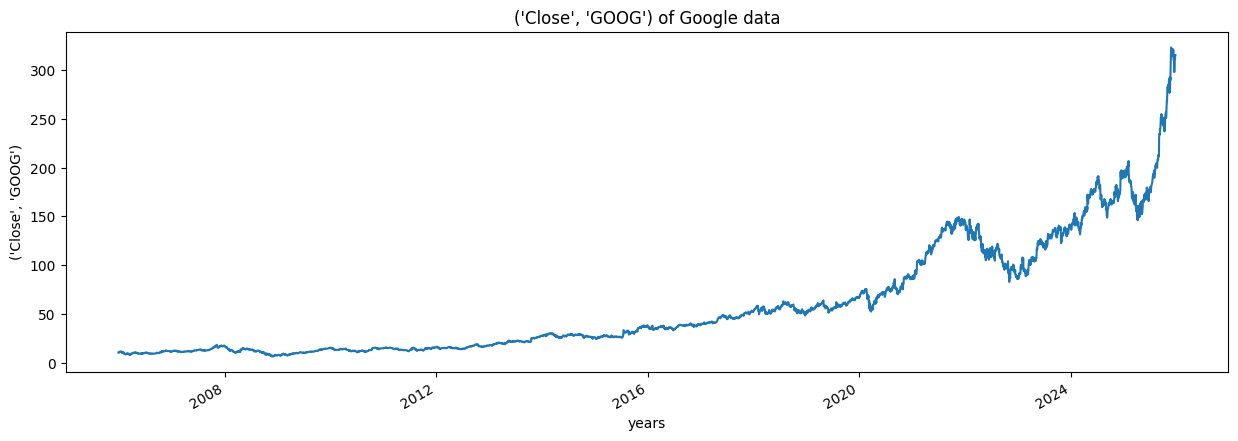

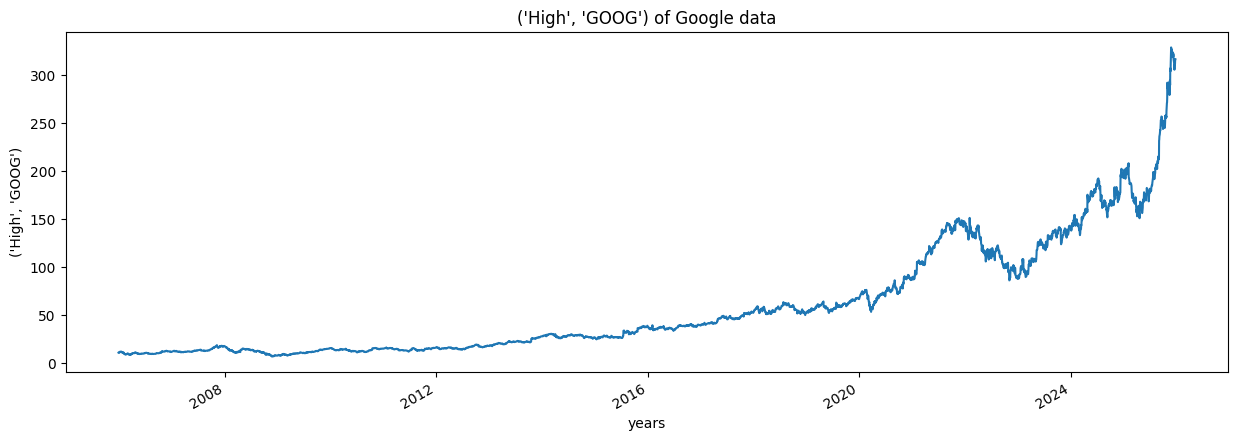

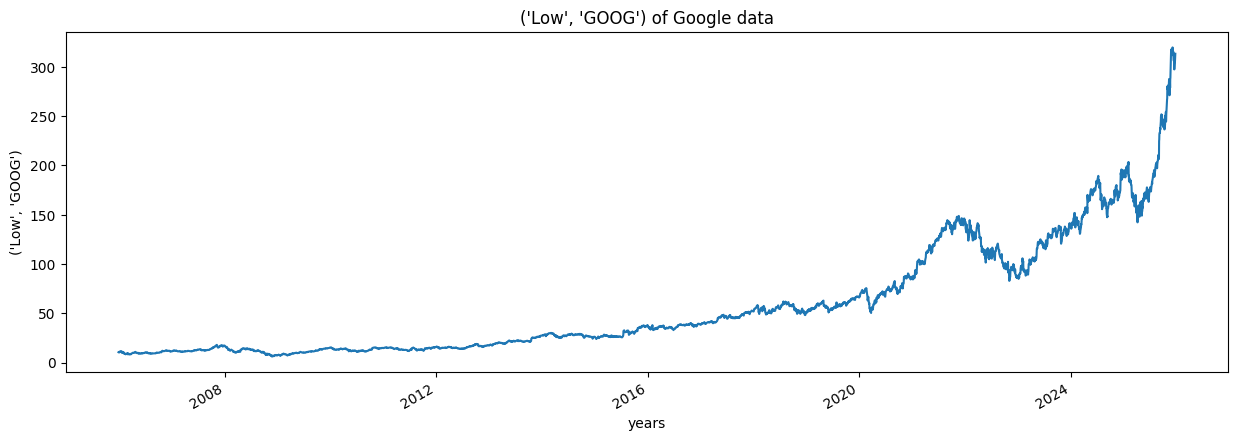

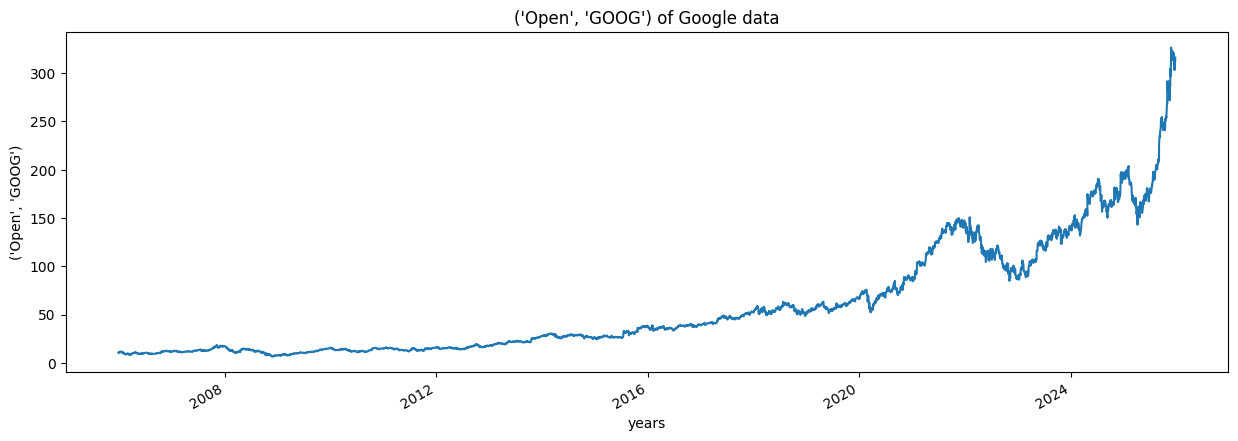

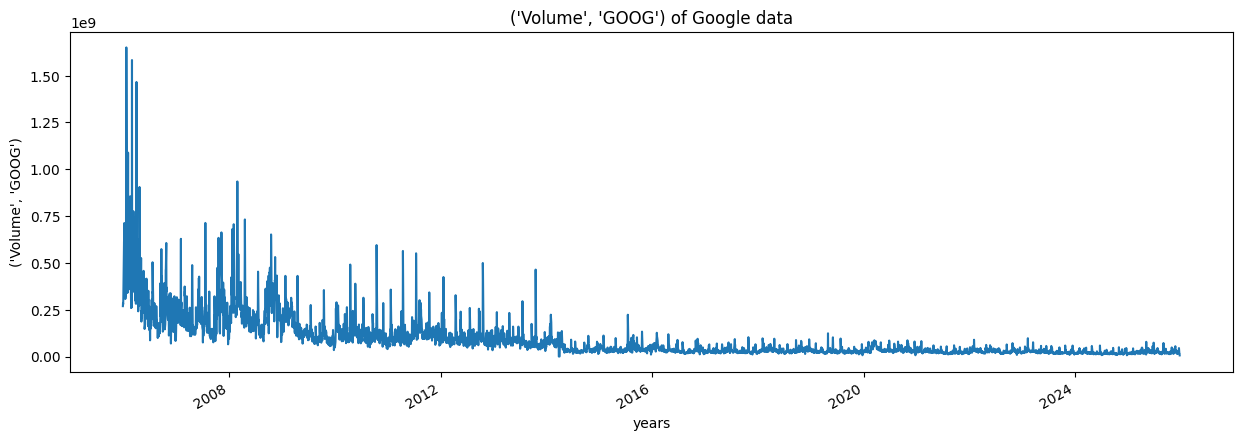

In [34]:
#Plotting graph for each column
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [35]:
#Rolling Window
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [36]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [37]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-12-15,NaN
2006-12-18,NaN
2006-12-19,NaN
2006-12-20,NaN
2006-12-21,10.144571


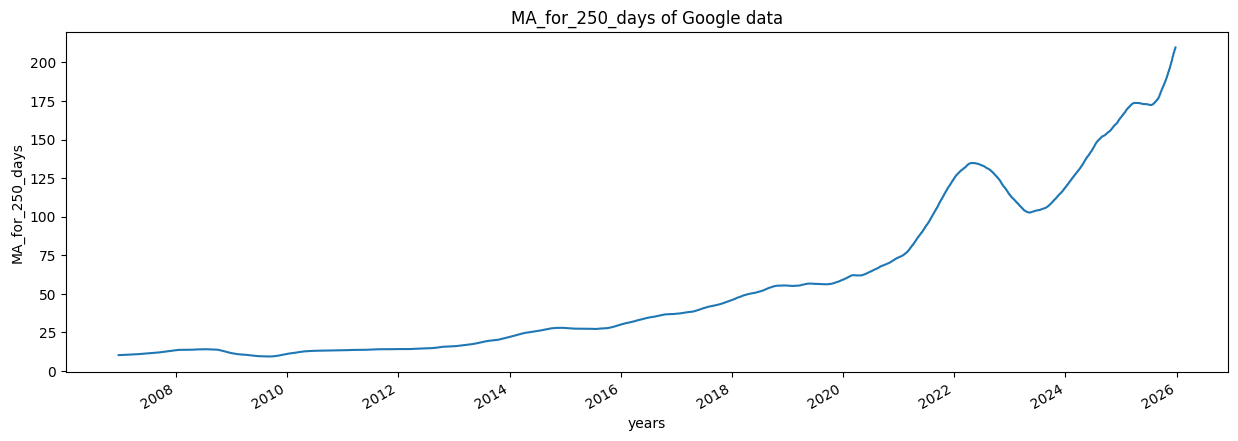

In [38]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

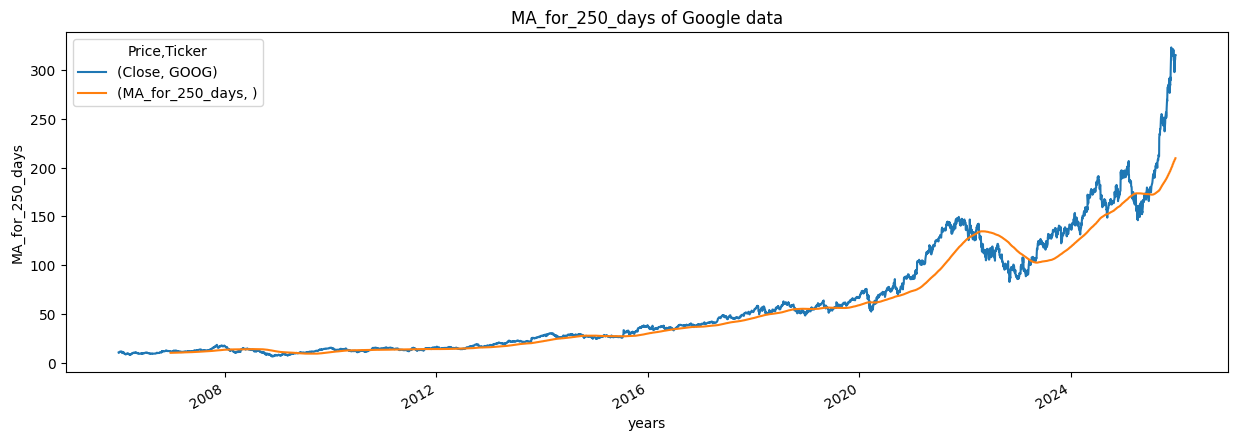

In [39]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

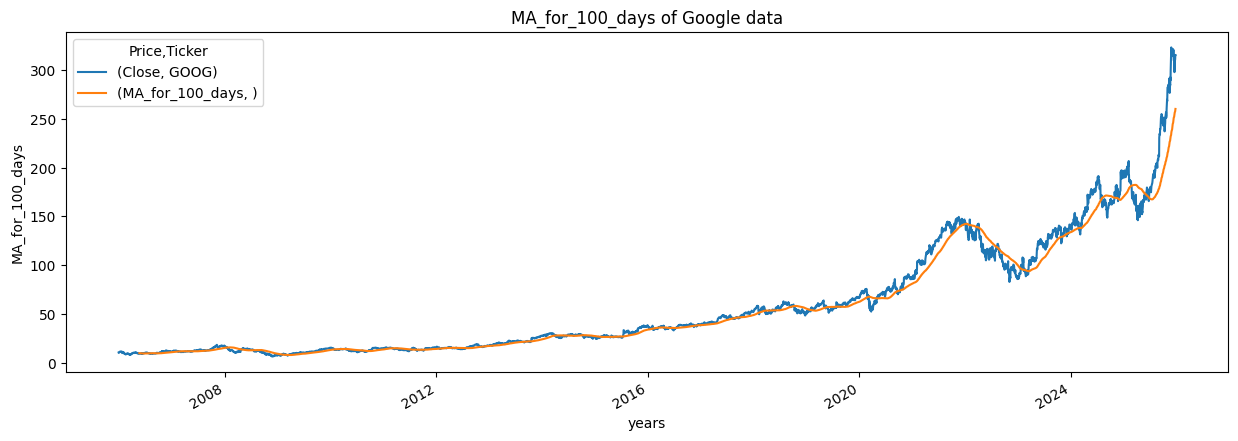

In [40]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

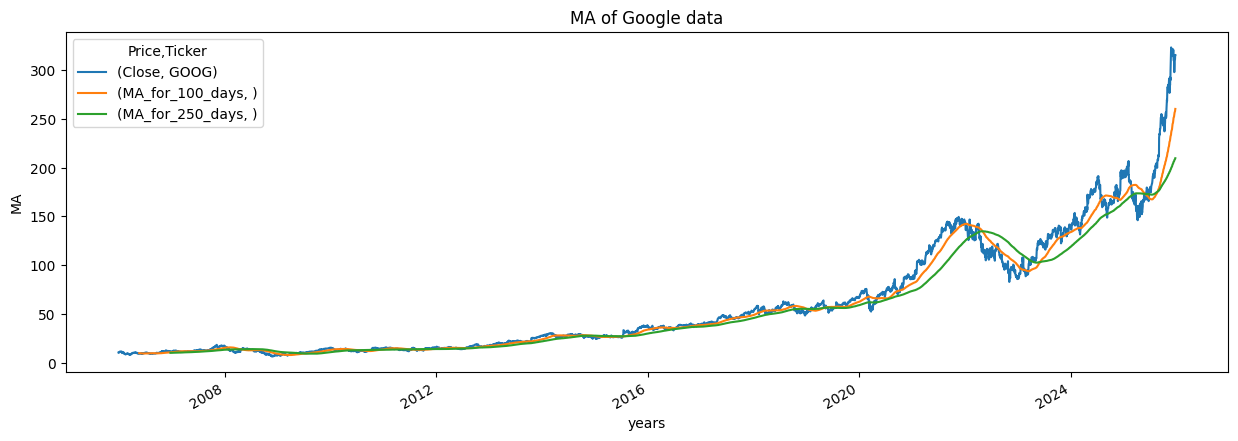

In [41]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [42]:
#Calculates daily percentage changes.
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-12-27,10.497622,NaN
2005-12-28,10.548303,0.004828
2005-12-29,10.386625,-0.015327
2005-12-30,10.255851,-0.012591
2006-01-03,10.759422,0.049101


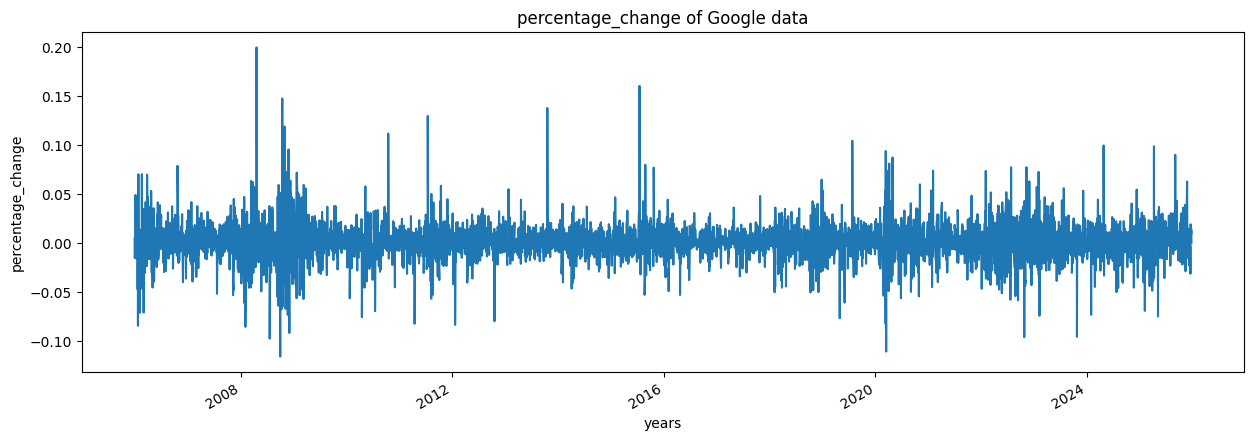

In [43]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [44]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler

close_price = google_data[['Close']]

scaler = MinMaxScaler(feature_range=(0,1))    #Scales data to the range [0, 1].
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.01303642],
       [0.01319626],
       [0.01268634],
       ...,
       [0.96184061],
       [0.97556022],
       [0.97552875]])

In [45]:
#Data Preparation for Time Series Modeling

x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

5034-100-int(len(x_data)*0.7)

1483

In [46]:
#Train-Test Split
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [47]:
#Building the LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))  # First LSTM layer
model.add(LSTM(64,return_sequences=False))  # Second LSTM layer
model.add(Dense(25))  # Fully connected layer with 25 neurons
model.add(Dense(1))   # Output layer with 1 neuron
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 286s 83ms/step - loss: 1.1747e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 288s 83ms/step - loss: 1.1426e-05


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [60]:
#Predicting Test Data
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [61]:
inv_predictions = scaler.inverse_transform(predictions)  #Converts predictions back to their original scale
inv_predictions

array([[ 70.66324 ],
       [ 71.88703 ],
       [ 71.898575],
       ...,
       [266.35464 ],
       [268.51892 ],
       [272.13538 ]], dtype=float32)

In [62]:
inv_y_test = scaler.inverse_transform(y_test)  #Converts labels back to their original scale
inv_y_test

array([[ 73.2620163 ],
       [ 73.41091156],
       [ 74.87243652],
       ...,
       [311.32998657],
       [315.67999268],
       [315.67001343]])

In [63]:
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print("Root Mean Squared Error (RMSE):")
print(rmse)

Root Mean Squared Error (RMSE):
10.721986528845406


In [64]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-02-06,73.262016,70.663239
2020-02-07,73.410912,71.887032
2020-02-10,74.872437,71.898575
2020-02-11,74.877914,73.377289
2020-02-12,75.348366,73.230949


<Figure size 640x480 with 0 Axes>

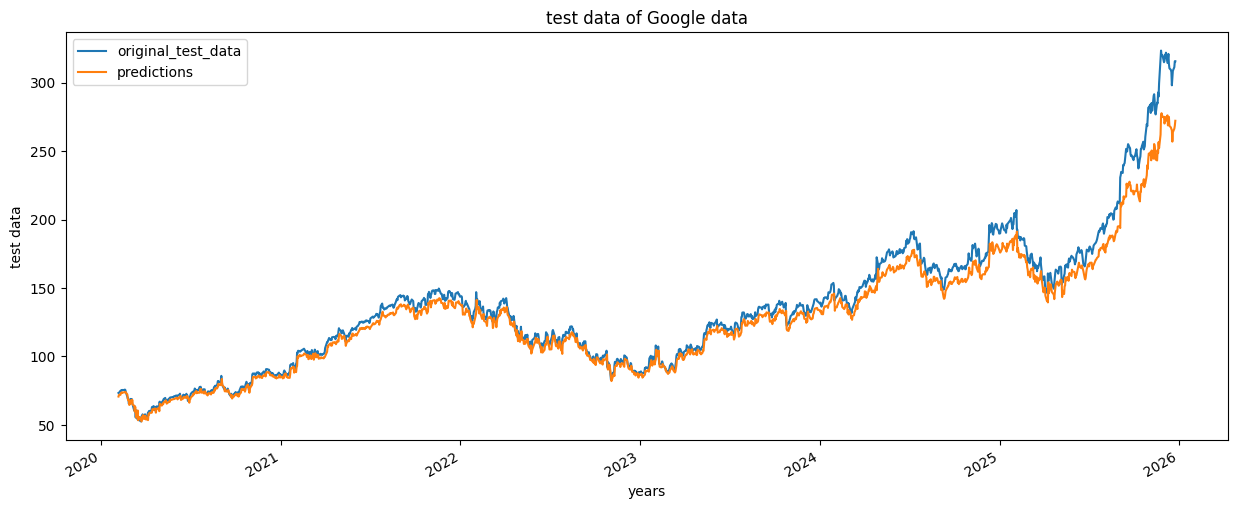

In [65]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

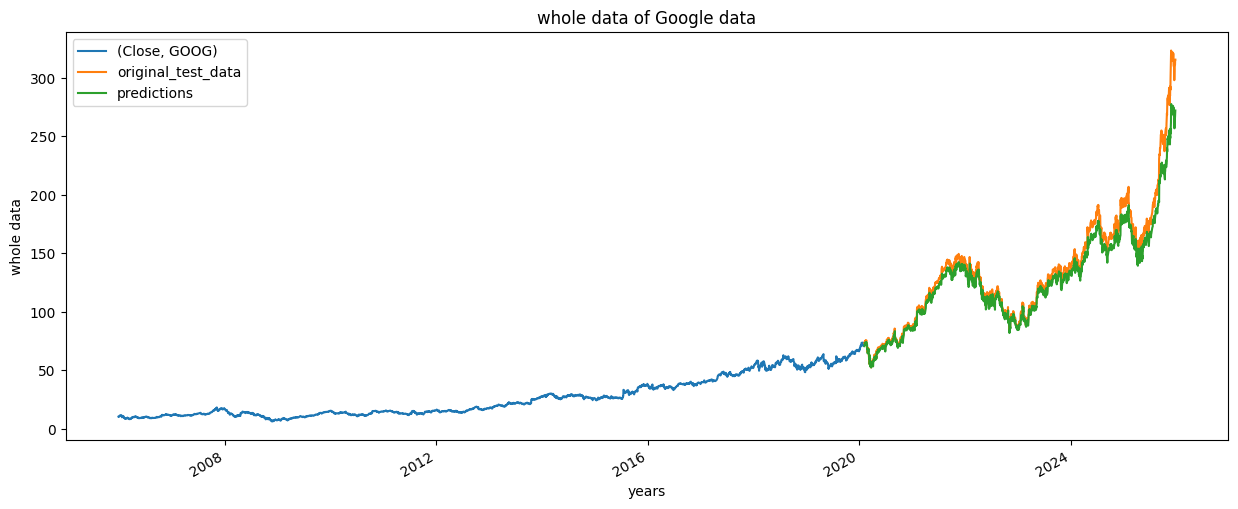

In [66]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [67]:
model.save("Latest_stock_price_model.keras")